In [1]:
import matplotlib.pyplot as plt

import numpy as np
import os
from ctd.comparison.analysis.tt.tt import Analysis_TT 
from ctd.comparison.analysis.dt.dt import Analysis_DT
# Import pca
import dotenv
from ctd.comparison.comparison import Comparison
import torch
from sklearn.decomposition import PCA

dotenv.load_dotenv(dotenv.find_dotenv())

True

In [2]:
def plot_model_fps(fps, latents = None, q_thresh = 1e-5, label = "Model"):
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    x_star = fps.xstar
    q_star = fps.qstar
    q_flag = q_star < q_thresh
    stability= fps.is_stable
    x_star = x_star[q_flag]
    q_star = q_star[q_flag]
    pca = PCA(n_components=3)
    if latents is not None:
        lats_flat = latents.reshape(-1, latents.shape[-1])
        lats_flat = pca.fit_transform(lats_flat)
        lats_pca = lats_flat.reshape(latents.shape[0], latents.shape[1], 3)
        x_star = pca.transform(x_star)
        for i in range(30):
            ax.plot(lats_pca[i,:,0], lats_pca[i,:,1], lats_pca[i,:,2], linewidth=0.5)
    else:
        x_star = pca.fit_transform(x_star)
    stability = stability[q_flag]
    stable_X = x_star[stability]
    unstable_X = x_star[~stability]
    ax.scatter(stable_X[:,0], stable_X[:,1], stable_X[:,2], c='g', marker='o', label = "Stable")
    ax.scatter(unstable_X[:,0], unstable_X[:,1], unstable_X[:,2], c='r', marker='x', label = "Unstable")
    ax.set_title(f"{label} FPS")
    ax.legend()
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_zlabel('PC3')
    plt.savefig(f"fps_{label}.pdf")

In [3]:
HOME_DIR = os.environ['HOME_DIR']
print(HOME_DIR)

pathTT = HOME_DIR + 'content/trained_models/task-trained/20240503_Fig1_NBFF_NODE/max_epochs=500 n_samples=1000 latent_size=3 seed=0 learning_rate=0.001/'
an_TT = Analysis_TT(run_name = "TT", filepath = pathTT)


path_GRU_Sweep = pathTT + "20240506_Fig1_NBFF_GRU_TT_NODE_Sweep/"
subfolders_GRU = [f.path for f in os.scandir(path_GRU_Sweep) if f.is_dir()]

path_LDS_Sweep = pathTT + "20240506_Fig1_NBFF_LDS_TT_NODE_Sweep/"
subfolders_LDS = [f.path for f in os.scandir(path_LDS_Sweep) if f.is_dir()]

path_NODE_Sweep = pathTT + "20240506_Fig1_NBFF_NODE_TT_NODE_Sweep/"
subfolders_NODE = [f.path for f in os.scandir(path_NODE_Sweep) if f.is_dir()]


/home/csverst/Github/CtDBenchmark/


In [4]:
comparison = Comparison(comparison_tag="Figure1NBFF_TTNODE_Sweep")
comparison.load_analysis(an_TT, reference_analysis=True, group = "TT")

for subfolder in subfolders_GRU:
    subfolder = subfolder + "/"
    analysis_GRU = Analysis_DT(run_name = "GRU", filepath = subfolder, model_type = "SAE")
    comparison.load_analysis(analysis_GRU, group = "GRU")

for subfolder in subfolders_LDS:
    subfolder = subfolder + "/"
    analysis_LDS = Analysis_DT(run_name = "LDS", filepath = subfolder, model_type = "SAE")
    comparison.load_analysis(analysis_LDS, group = "LDS")

for subfolder in subfolders_NODE:
    subfolder = subfolder + "/"
    analysis_NODE = Analysis_DT(run_name = "NODE", filepath = subfolder, model_type = "SAE")
    comparison.load_analysis(analysis_NODE, group = "NODE")


comparison.regroup()

Working on 1 of 16: GRU
Group: GRU
Rate R2: 0.9640243778859292
State R2: 0.6570858931912071
Working on 2 of 16: GRU
Group: GRU
Rate R2: 0.9647493062493414
State R2: 0.65673922444577
Working on 3 of 16: GRU
Group: GRU
Rate R2: 0.967515623566692
State R2: 0.6629861016728061
Working on 4 of 16: GRU
Group: GRU
Rate R2: 0.9626270975951416
State R2: 0.6693639578194305
Working on 5 of 16: GRU
Group: GRU
Rate R2: 0.9659998959720649
State R2: 0.6513829178329763
Working on 6 of 16: LDS
Group: LDS
Rate R2: 0.2848151749196537
State R2: 0.27299451906063094
Working on 7 of 16: LDS
Group: LDS
Rate R2: 0.2770171893706206
State R2: 0.2694756949162626
Working on 8 of 16: LDS
Group: LDS
Rate R2: 0.28577797804985394
State R2: 0.2756313049547175
Working on 9 of 16: LDS
Group: LDS
Rate R2: 0.2816327708138988
State R2: 0.2761684231541096
Working on 10 of 16: LDS
Group: LDS
Rate R2: 0.28347212678167183
State R2: 0.27360511100828433
Working on 11 of 16: NODE
Group: NODE
Working on 12 of 16: NODE
Group: NODE
Ra

array([[0.96402438, 0.65708589],
       [0.96474931, 0.65673922],
       [0.96751562, 0.6629861 ],
       [0.9626271 , 0.66936396],
       [0.9659999 , 0.65138292],
       [0.28481517, 0.27299452],
       [0.27701719, 0.26947569],
       [0.28577798, 0.2756313 ],
       [0.28163277, 0.27616842],
       [0.28347213, 0.27360511],
       [0.        , 0.        ],
       [0.99630745, 0.99667446],
       [0.        , 0.        ],
       [0.99658318, 0.99654721],
       [0.99475636, 0.99602729],
       [0.        , 0.        ]])

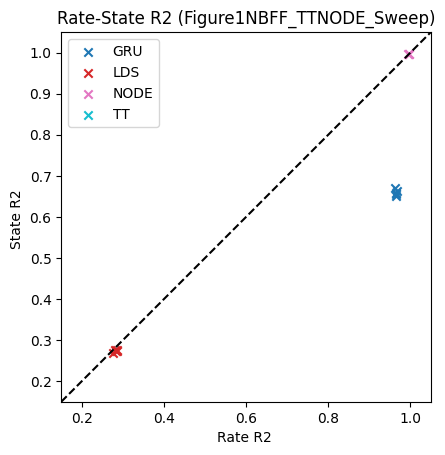

In [5]:
plot_dict = {
    "save_pdf": True,
    "ax_lim": [0.15, 1.05],
    "marker": "x",
}
comparison.compare_rate_state_r2(plot_dict=plot_dict)

In [6]:
comparison_single = Comparison(comparison_tag="Figure1NBFF_TTNODE_Single")
comparison_single.load_analysis(an_TT, reference_analysis=True, group = "TT")
comparison_single.load_analysis(analysis_NODE, group = "NODE")
comparison_single.load_analysis(analysis_LDS, group = "LDS")
comparison_single.load_analysis(analysis_GRU, group = "GRU")
comparison_single.regroup()

# comparison_single.plot_trials_reference(num_trials =2, num_pcs=4)

Working on 1 of 3: GRU
Working on 2 of 3: LDS
Working on 3 of 3: NODE
Neuron 1
R2s: [0.96454182 0.95158737 0.97473356 0.96835658 0.97886903 0.95542951
 0.96720454 0.94099811 0.97673141 0.97727627 0.96920258 0.94638395
 0.95989267 0.9710117  0.9779755  0.95491463 0.9667551  0.9779265
 0.95679052 0.96899021 0.97738594 0.96704096 0.97520452 0.95161144
 0.97775625 0.97145324 0.95870628 0.97160186 0.97835196 0.95913377
 0.95758826 0.96367274 0.97692054 0.94800748 0.97943029 0.96486949
 0.9783478  0.92348509 0.96943638 0.94703644 0.97665711 0.96997739
 0.98063124 0.97243578 0.95167259 0.95860164 0.97292064 0.97147956
 0.96789286 0.97675826]
Neuron 2
R2s: [0.2556129  0.28198425 0.31384283 0.25617871 0.31393838 0.28011873
 0.25603787 0.28289768 0.31383432 0.31426369 0.25670864 0.28048234
 0.28074394 0.2557796  0.31359963 0.28233153 0.25701406 0.31412457
 0.28073659 0.25579558 0.31378629 0.25579533 0.31423411 0.2823639
 0.31345527 0.25611122 0.28332968 0.25753518 0.31249626 0.28222502
 0.282516

[array([0.96454182, 0.95158737, 0.97473356, 0.96835658, 0.97886903,
        0.95542951, 0.96720454, 0.94099811, 0.97673141, 0.97727627,
        0.96920258, 0.94638395, 0.95989267, 0.9710117 , 0.9779755 ,
        0.95491463, 0.9667551 , 0.9779265 , 0.95679052, 0.96899021,
        0.97738594, 0.96704096, 0.97520452, 0.95161144, 0.97775625,
        0.97145324, 0.95870628, 0.97160186, 0.97835196, 0.95913377,
        0.95758826, 0.96367274, 0.97692054, 0.94800748, 0.97943029,
        0.96486949, 0.9783478 , 0.92348509, 0.96943638, 0.94703644,
        0.97665711, 0.96997739, 0.98063124, 0.97243578, 0.95167259,
        0.95860164, 0.97292064, 0.97147956, 0.96789286, 0.97675826]),
 array([0.2556129 , 0.28198425, 0.31384283, 0.25617871, 0.31393838,
        0.28011873, 0.25603787, 0.28289768, 0.31383432, 0.31426369,
        0.25670864, 0.28048234, 0.28074394, 0.2557796 , 0.31359963,
        0.28233153, 0.25701406, 0.31412457, 0.28073659, 0.25579558,
        0.31378629, 0.25579533, 0.31423411, 0.

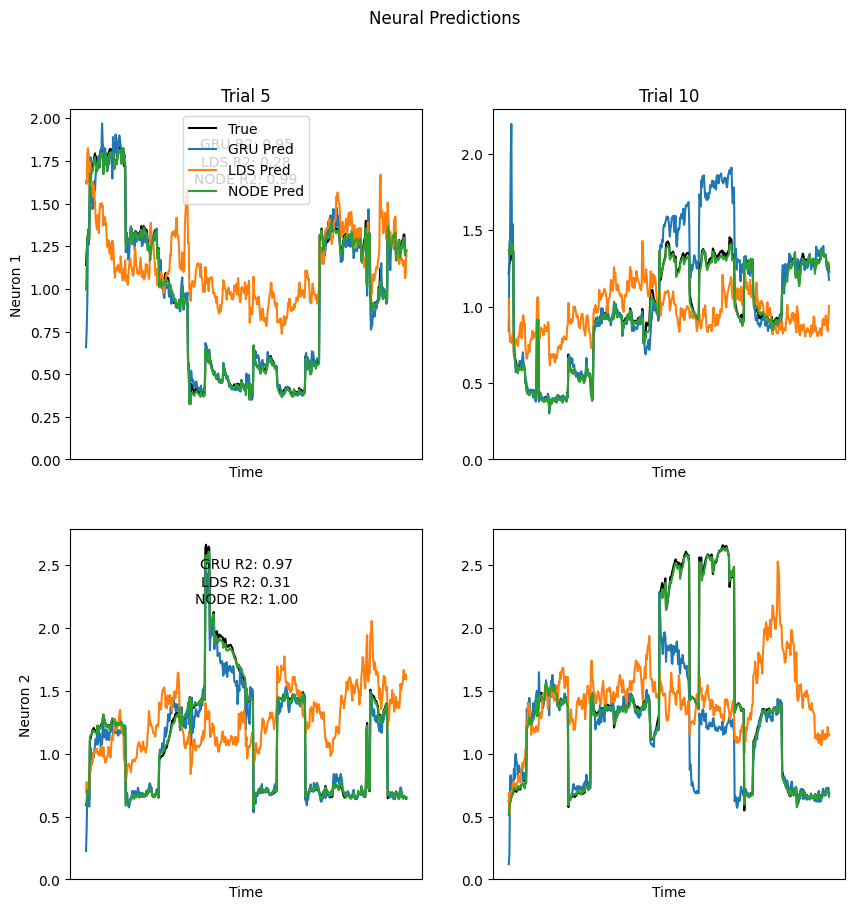

In [7]:
comparison_single.plot_neural_preds(neuron_list =[1,2], trial_list = [5,10])

In [8]:
fpsTT = an_TT.plot_fps(
    inputs = torch.zeros(3),
    max_iters = 40000,
    learning_rate =5e-3,
)


Iteration 500/40000
q = 3.48E-07 +/- 7.52E-06
dq = 1.72E-10 +/- 5.46E-09

Iteration 1000/40000
q = 3.31E-07 +/- 7.50E-06
dq = 7.22E-13 +/- 1.62E-11

Iteration 1500/40000
q = 1.14E-07 +/- 3.65E-06
dq = 5.44E-09 +/- 1.74E-07

Iteration 2000/40000
q = 1.95E-15 +/- 3.69E-14
dq = 2.82E-16 +/- 4.85E-15

Iteration 2500/40000
q = 5.89E-13 +/- 1.86E-11
dq = 1.39E-13 +/- 4.37E-12

Iteration 3000/40000
q = 7.20E-13 +/- 2.25E-11
dq = 7.12E-13 +/- 2.21E-11

Iteration 3500/40000
q = 1.66E-11 +/- 2.45E-10
dq = 5.09E-12 +/- 7.90E-11

Iteration 4000/40000
q = 7.33E-12 +/- 1.97E-10
dq = 1.33E-12 +/- 3.35E-11

Iteration 4500/40000
q = 4.62E-12 +/- 1.02E-10
dq = 2.39E-12 +/- 5.02E-11

Iteration 5000/40000
q = 5.41E-11 +/- 1.16E-09
dq = 1.32E-11 +/- 2.77E-10

Iteration 5500/40000
q = 8.12E-12 +/- 2.19E-10
dq = 2.81E-12 +/- 6.06E-11

Iteration 6000/40000
q = 2.73E-11 +/- 5.34E-10
dq = 8.31E-12 +/- 1.48E-10

Iteration 6500/40000
q = 1.52E-10 +/- 2.54E-09
dq = 6.78E-11 +/- 1.01E-09

Iteration 7000/40000
q = 

KeyboardInterrupt: 

In [ ]:
fpsDT_GRU = analysis_GRU.plot_fps(
    inputs = torch.zeros(3),
    max_iters = 40000,
    learning_rate =5e-3,
)

In [ ]:
fpsDT_NODE = analysis_NODE.plot_fps(
    inputs = torch.zeros(3),
    max_iters = 40000,
    learning_rate =5e-3,
)

In [ ]:
fpsDT_LDS = analysis_LDS.plot_fps(
    inputs = torch.zeros(3),
    max_iters = 40000,
    learning_rate =5e-3,
)

In [ ]:

comparison_models = Comparison()
comparison_models.load_analysis(an_TT, reference_analysis=True, group = "TT")
comparison_models.load_analysis(analysis_GRU, group = "GRU")
comparison_models.load_analysis(analysis_NODE, group = "NODE")
comparison_models.load_analysis(analysis_LDS, group = "LDS")
comparison_models.regroup()

In [ ]:
comparison_models.plot_trials_reference(num_trials=2, num_pcs=4)

In [ ]:
lds_fps = analysis_LDS.plot_fps(
    inputs = torch.zeros(3),
    learning_rate = 1e-3,
    n_inits=1024,
    max_iters = 20000,                      
)



In [ ]:
node_fps = analysis_NODE.plot_fps(
    inputs = torch.zeros(3),
    learning_rate = 6e-4,
    n_inits=1024,
    max_iters = 50000,                      
)

In [ ]:
gru_fps = analysis_GRU.plot_fps(
    inputs = torch.zeros(3),
    learning_rate = 6e-4,
    n_inits=1024,
    max_iters = 50000,                      
)

In [ ]:
plot_model_fps(lds_fps, q_thresh = 1e-4)
plot_model_fps(node_fps, q_thresh = 1e-4)
plot_model_fps(gru_fps, q_thresh = 4e-7)